In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
def mergeInstanceResults(prefix, no_instances, type, crop=False):
    result_df = pd.DataFrame();
    for i in range(1, no_instances+1):
        path = f"{prefix + str(i)}/{type}.csv"
        df = pd.read_csv(path, sep=";", decimal=",")
        result_df = pd.concat([result_df, df], ignore_index=True)
    result_df = result_df.iloc[:1000, :-1] if crop else result_df.iloc[:, :-1]
    return result_df

In [3]:
stations = [
    mergeInstanceResults("./results/Strat01/", 8, "stationUsage"),
    mergeInstanceResults("./results/Strat02/", 8, "stationUsage"),
    mergeInstanceResults("./results/RLAgent/", 1, "stationUsage")
]
buffers = [
    mergeInstanceResults("./results/Strat01/", 8, "bufferUsage"),
    mergeInstanceResults("./results/Strat02/", 8, "bufferUsage"),
    mergeInstanceResults("./results/RLAgent/", 1, "bufferUsage")
]
drains = [
    mergeInstanceResults("./results/Strat01/", 8, "drainUsage"),
    mergeInstanceResults("./results/Strat02/", 8, "drainUsage"),
    mergeInstanceResults("./results/RLAgent/", 1, "drainUsage")
]
experiments = [
    mergeInstanceResults("./results/Strat01/", 8, "experiments"),
    mergeInstanceResults("./results/Strat02/", 8, "experiments"),
    mergeInstanceResults("./results/RLAgent/", 1, "experiments", crop=True)
]

In [47]:
print(experiments)

     Success
0       True
1      False
2      False
3       True
4       True
..       ...
995     True
996    False
997    False
998     True
999    False

[1000 rows x 1 columns]


<BarContainer object of 2 artists>

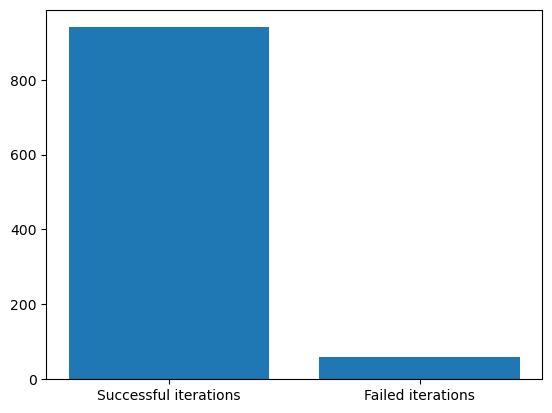

In [5]:
plt.bar(["Successful iterations", "Failed iterations"], experiments[2].Success.value_counts())

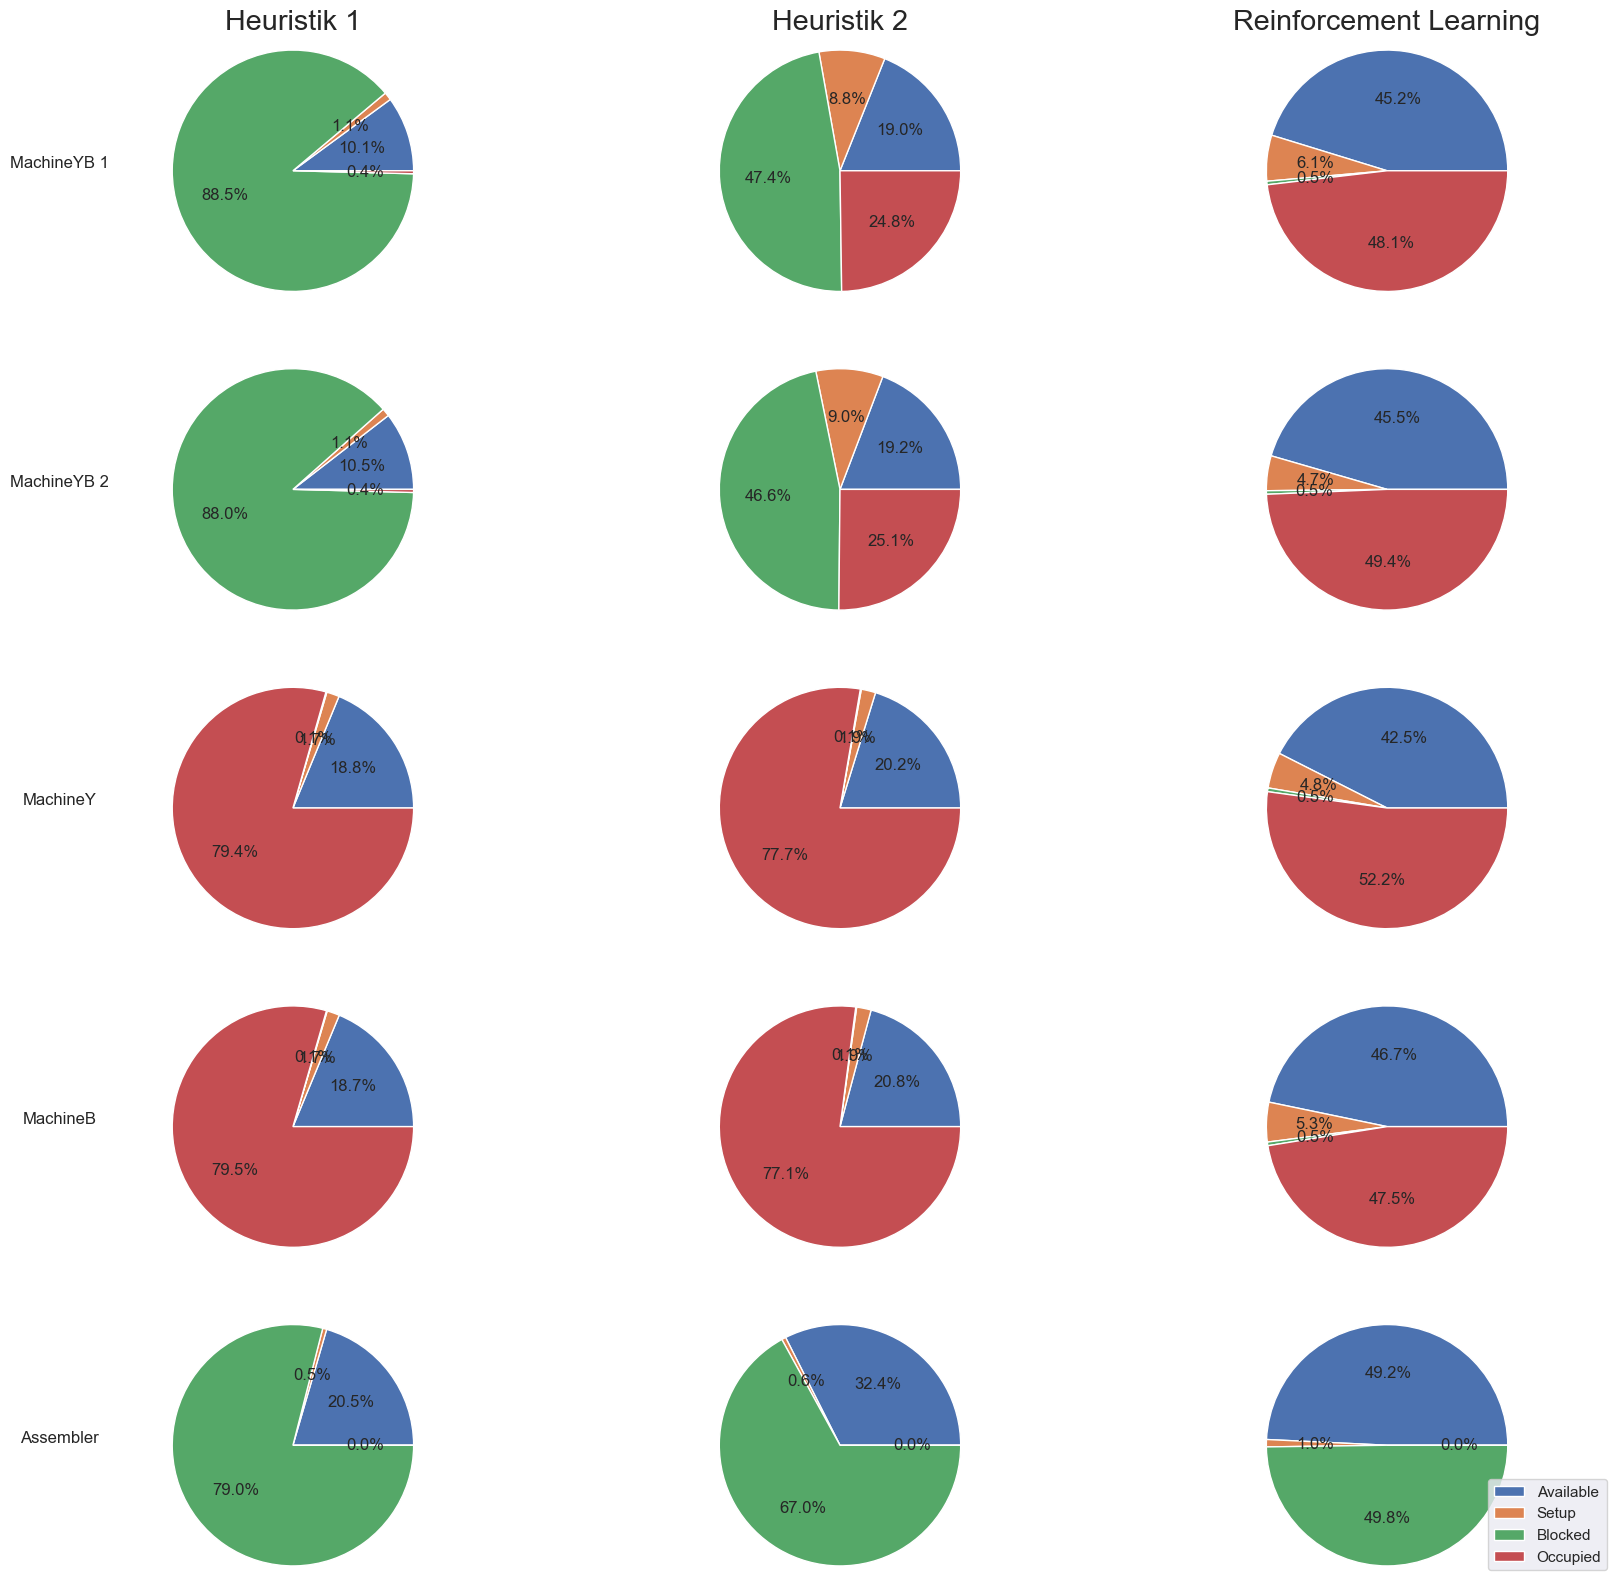

In [94]:
#sns.set()
fig, axes = plt.subplots(5,3, figsize=(20,20))
cols = ["Heuristik 1", "Heuristik 2", "Reinforcement Learning"]
for ax, col in zip(axes[0], cols):
    ax.set_title(col, size="xx-large")

for i, stationsEl in enumerate(stations):
    if i == 0:
        for ax, row in zip(axes[:,0], stationsEl.Name.unique().tolist()):
            ax.set_ylabel(row, rotation=0)
    for j, stationName in enumerate(stationsEl.Name.unique().tolist()):
        current = stationsEl[stationsEl.Name == stationName].iloc[:, 1:]
        avg = [current.Available.mean(), current.Setup.mean(), current.Blocked.mean(), current.Occupied.mean()]
        #axes[j, i].set_title(stationName)
        axes[j, i].pie(avg, labels=current.columns.to_list(), autopct='%1.1f%%', labeldistance=None)
        axes[j, i].axis('equal')
        #axes[idx].legend(loc="lower right")

plt.legend(loc="lower right")
plt.show()

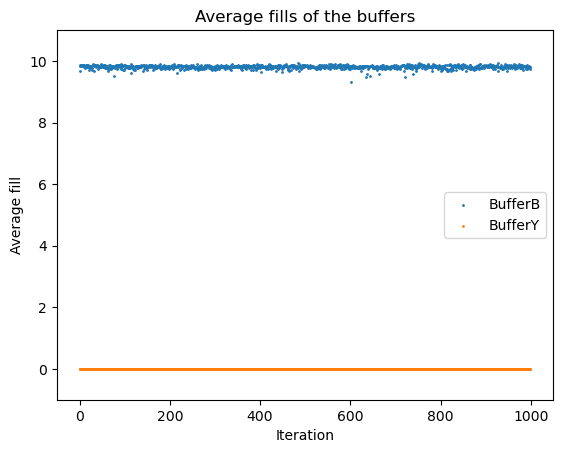

In [50]:
bufferNames = buffers.Name.unique().tolist()
for bufferName in bufferNames:
    #fig, ax = plt.subplots()

    current = buffers[buffers.Name == bufferName].iloc[:, 1:]
    current = current.reset_index(drop=True)
    #successful = current[experiments.Success]
    #unsuccessful = current[~experiments.Success]
    plt.scatter(current.index, current, s=1)
    #plt.scatter(successful.index, successful, color="green", s=1)
    #plt.scatter(unsuccessful.index, unsuccessful, color="red", s=1)
    plt.ylim(-1, 11)
    #ax.set_title(bufferName)

plt.title("Average fills of the buffers")
plt.ylabel("Average fill")
plt.xlabel("Iteration")
plt.legend(bufferNames)
plt.show()

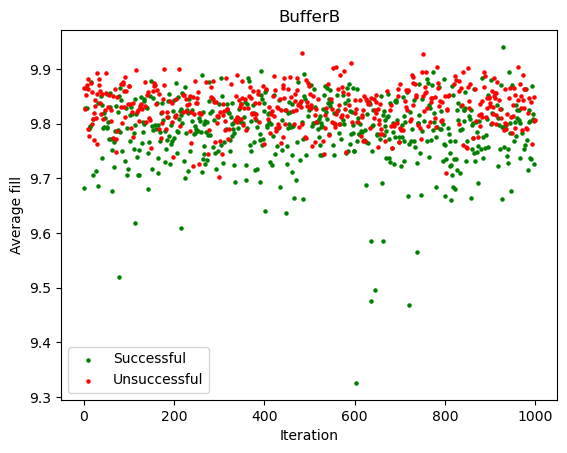

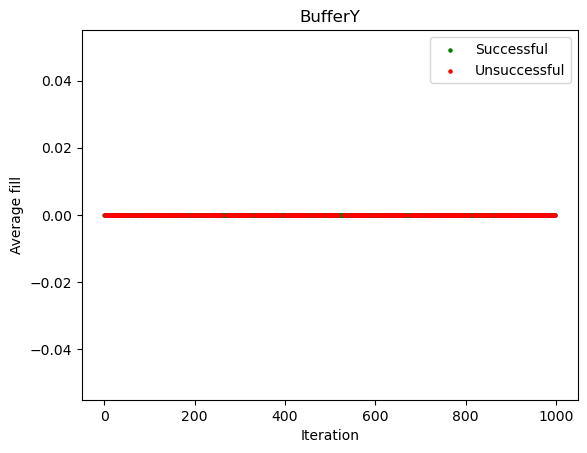

In [51]:
bufferNames = buffers.Name.unique().tolist()
for bufferName in bufferNames:
    fig, ax = plt.subplots()

    current = buffers[buffers.Name == bufferName].iloc[:, 1:]
    current = current.reset_index(drop=True)
    successful = current[experiments.Success]
    unsuccessful = current[~experiments.Success]
    ax.scatter(successful.index, successful, color="green", s=5)
    ax.scatter(unsuccessful.index, unsuccessful, color="red", s=5)
    ax.set_title(bufferName)
    plt.ylabel("Average fill")
    plt.xlabel("Iteration")
    plt.legend(["Successful", "Unsuccessful"])
    plt.show()

#plt.title("Average fills of the buffers")

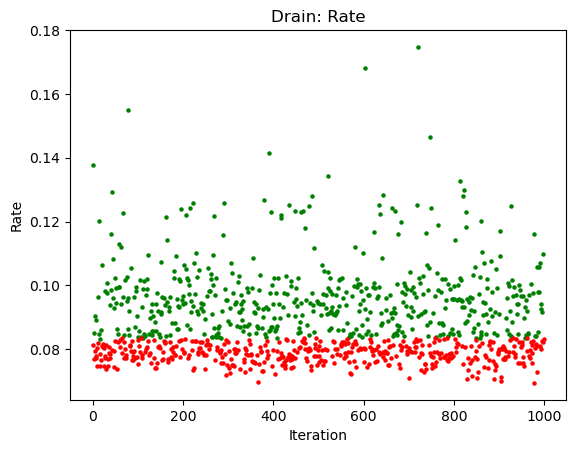

In [52]:
current = drains.iloc[:, 1:]
successful = current[experiments.Success]
unsuccessful = current[~experiments.Success]
#plt.scatter(current.index, current.Drainrate, s=1)
plt.scatter(successful.index, successful.Drainrate, color="green", s=5)
plt.scatter(unsuccessful.index, unsuccessful.Drainrate, color="red", s=5)
#plt.ylim(0, 1)
#ax.set_title(bufferName)

plt.title("Drain: Rate")
plt.ylabel("Rate")
plt.xlabel("Iteration")
plt.show()

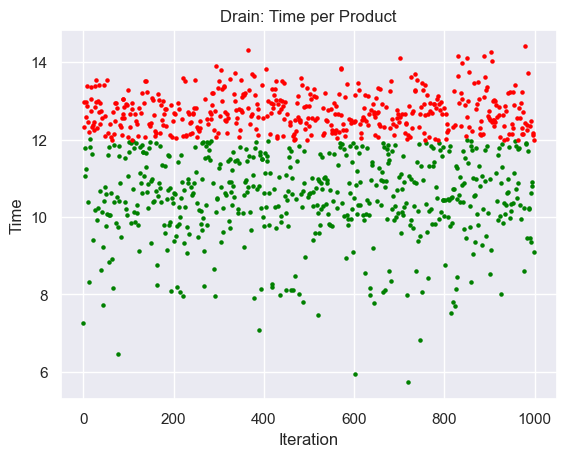

In [102]:
id = 0
current = drains[id].iloc[:, 1:]
successful = current[experiments[id].Success]
unsuccessful = current[~experiments[id].Success]
#plt.scatter(current.index, current.Drainrate, s=1)
plt.scatter(successful.index, successful["Time per Product"], color="green", s=5)
plt.scatter(unsuccessful.index, unsuccessful["Time per Product"], color="red", s=5)
#plt.ylim(0, 1)
#ax.set_title(bufferName)

plt.title("Drain: Time per Product")
plt.ylabel("Time")
plt.xlabel("Iteration")
plt.show()